In [1]:
from modelTraining import run_model, load_from_file, compute_feature_ranking, plot_metrics
import joblib
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NeuralNetwork import createMLP, createMLP_variableSizes, OurNeuralNetwork
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler        # Normalizaçao
from sklearn.preprocessing import MinMaxScaler          # Normalizaçao

SEED = 42

In [2]:
num_features = 4

# --- Carregar dataset Iris ---
def load_data_set():
    data = load_iris()
    X = data.data
    y = data.target
    return X, y

def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Modelo salvo em {filename}")

def load_model(filename):
    model = joblib.load(filename)
    print(f"Modelo carregado de {filename}")
    return model

X_iris, y_iris = load_data_set()

# EX 2

## EX 2.1. - Baseline

### Random Classifier

In [ ]:
random_model = DummyClassifier(strategy='uniform', random_state=SEED)
# parameters = {"DummyClassifier": {'strategy': ['most_frequent', 'stratified', 'uniform']}}

metrics_to = run_model(X_iris, y_iris, random_model, "TO", None, "Random Classifier TO", "Random Classifier TO", random_state=SEED)
metrics_tt = run_model(X_iris, y_iris, random_model, "TT", None, "Random Classifier TT", "Random Classifier TT", random_state=SEED)
metrics_cv = run_model(X_iris, y_iris, random_model, "CV-base", None, "Random Classifier CV", "Random Classifier CV", random_state=SEED, feature_ranking=False)


===== Random Classifier TO =====
Confusion Matrix:
[[15 15 20]
 [18 21 11]
 [15 10 25]]
Recall:    0.4067
Precision: 0.4052
F1-Score:  0.4051

===== Random Classifier TT =====
Confusion Matrix:
[[2 6 7]
 [6 4 5]
 [6 2 7]]
Recall:    0.2889
Precision: 0.2815
F1-Score:  0.2820

===== Random Classifier CV (means) =====
Recall:    0.4000
Precision: 0.4444
F1-Score:  0.3862


### One R

In [11]:
oneR = DecisionTreeClassifier(max_depth=5, random_state=SEED)
# parameters = {"oneR": {
#         'max_depth': [None, 5, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'criterion': ['gini', 'entropy']
#     }}

metrics_to = run_model(X_iris, y_iris, oneR, "TO", None, "One R TO", "One R TO", random_state=SEED)
metrics_tt = run_model(X_iris, y_iris, oneR, "TT", None, "One R TT", "One R TT", random_state=SEED)
metrics_cv = run_model(X_iris, y_iris, oneR, "CV-base", None, "One R CV", "One R CV", random_state=SEED, feature_ranking=False)


===== One R TO =====
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Recall:    0.9933
Precision: 0.9935
F1-Score:  0.9933

===== One R TT =====
Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]
Recall:    0.9333
Precision: 0.9444
F1-Score:  0.9327

===== One R CV (means) =====
Recall:    0.9447
Precision: 0.9523
F1-Score:  0.9439


## EX 2.2.1. - kNN (k = 1)

In [5]:
k = 1
kNN = KNeighborsClassifier(n_neighbors = k)
parameters = {'KNeighborsClassifier' : {
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
        }}

metrics_to = run_model(X_iris, y_iris, kNN, "TO", None, "kNN TO", "kNN TO", random_state=SEED)
metrics_tt = run_model(X_iris, y_iris, kNN, "TT", None, "kNN TT", "kNN TT", random_state=SEED)
metrics_cv = run_model(X_iris, y_iris, kNN, "CV-base", None, "kNN CV", "kNN CV", random_state=SEED)


===== kNN TO =====
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000

===== kNN TT =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
Recall:    0.9333
Precision: 0.9444
F1-Score:  0.9327

===== kNN CV (means) =====
Recall:    0.9587
Precision: 0.9646
F1-Score:  0.9581


## EX 2.2.2. - kNN (k in range(1,16,2))


===== kNN TO k = 1 =====
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


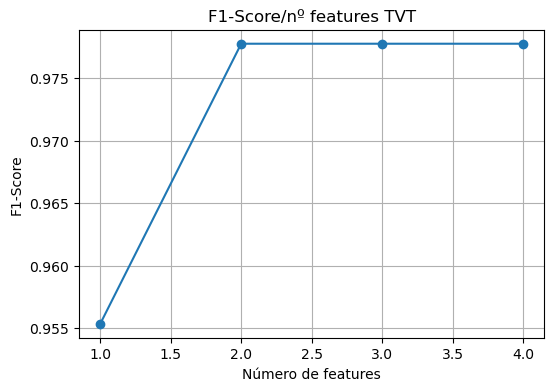

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 1 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Recall:    0.9778
Precision: 0.9792
F1-Score:  0.9778
Modelo salvo em kNN TVT k = 1

===== kNN CV k = 1 (means) =====
Recall:    0.9587
Precision: 0.9646
F1-Score:  0.9581

===== kNN TO k = 3 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


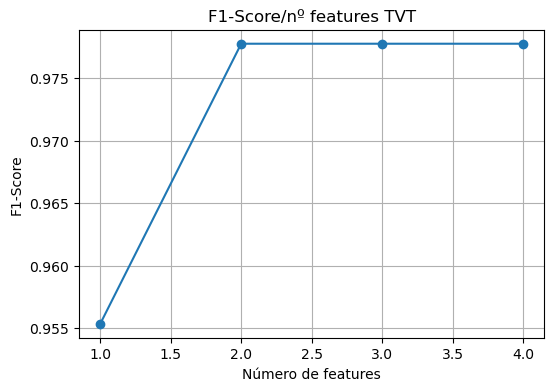

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 3 =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em kNN TVT k = 3

===== kNN CV k = 3 (means) =====
Recall:    0.9620
Precision: 0.9675
F1-Score:  0.9616

===== kNN TO k = 5 =====
Confusion Matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  2 48]]
Recall:    0.9600
Precision: 0.9605
F1-Score:  0.9600
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,1.000000,1.000000,1.000000


TOP 4 features
BEST FEATURES [3 2 0 1]


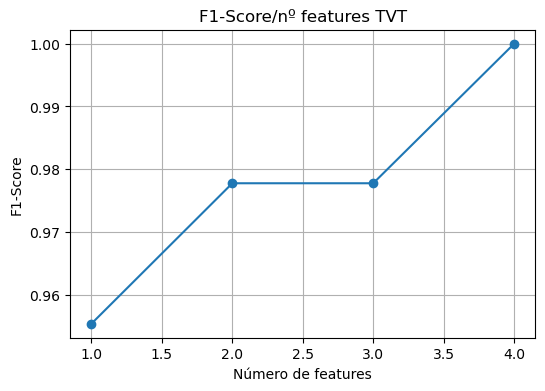

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 5 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Recall:    0.9778
Precision: 0.9792
F1-Score:  0.9778
Modelo salvo em kNN TVT k = 5

===== kNN CV k = 5 (means) =====
Recall:    0.9640
Precision: 0.9691
F1-Score:  0.9636

===== kNN TO k = 7 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,1.000000,1.000000,1.000000


TOP 4 features
BEST FEATURES [3 2 0 1]


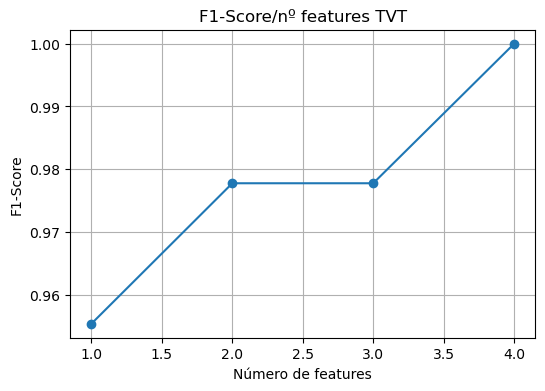

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 7 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
Recall:    0.9556
Precision: 0.9608
F1-Score:  0.9554
Modelo salvo em kNN TVT k = 7

===== kNN CV k = 7 (means) =====
Recall:    0.9627
Precision: 0.9672
F1-Score:  0.9624

===== kNN TO k = 9 =====
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
Recall:    0.9733
Precision: 0.9733
F1-Score:  0.9733
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,1.000000,1.000000,1.000000


TOP 4 features
BEST FEATURES [3 2 0 1]


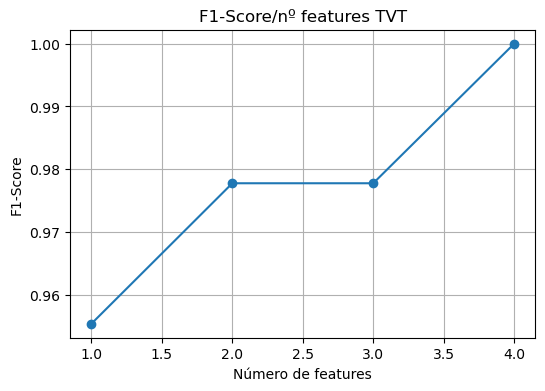

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 9 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
Recall:    0.9556
Precision: 0.9608
F1-Score:  0.9554
Modelo salvo em kNN TVT k = 9

===== kNN CV k = 9 (means) =====
Recall:    0.9667
Precision: 0.9709
F1-Score:  0.9663

===== kNN TO k = 11 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Recall:    0.9600
Precision: 0.9600
F1-Score:  0.9600
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.955556,0.960784,0.955357


TOP 2 features
BEST FEATURES [3 2]


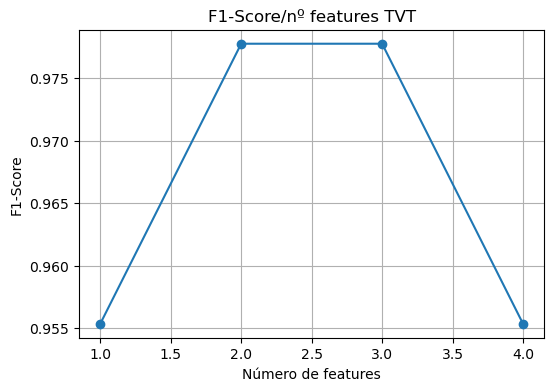

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 11 =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em kNN TVT k = 11

===== kNN CV k = 11 (means) =====
Recall:    0.9660
Precision: 0.9705
F1-Score:  0.9657

===== kNN TO k = 13 =====
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.955556,0.960784,0.955357
3,4,0.933333,0.944444,0.932660


TOP 2 features
BEST FEATURES [3 2]


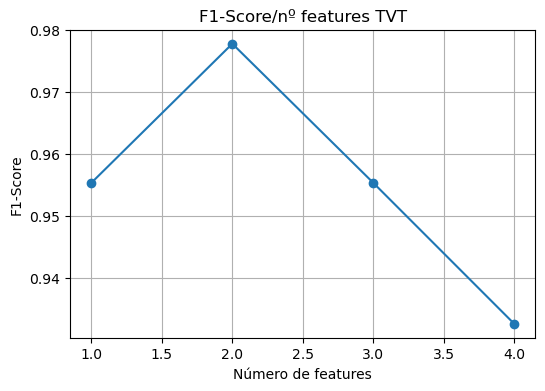

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 13 =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em kNN TVT k = 13

===== kNN CV k = 13 (means) =====
Recall:    0.9687
Precision: 0.9731
F1-Score:  0.9683

===== kNN TO k = 15 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


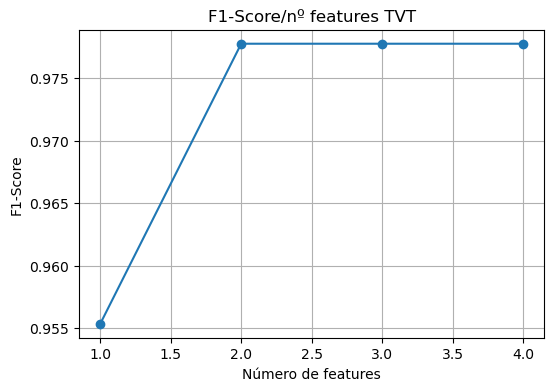

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 15 =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em kNN TVT k = 15

===== kNN CV k = 15 (means) =====
Recall:    0.9707
Precision: 0.9750
F1-Score:  0.9703


TypeError: 'float' object is not subscriptable

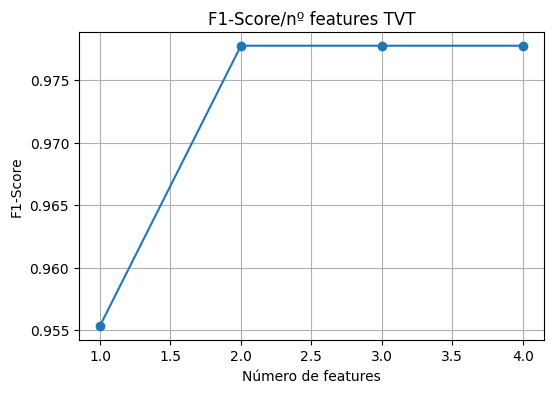

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 1 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Recall:    0.9778
Precision: 0.9792
F1-Score:  0.9778
Modelo salvo em kNN TVT k = 1

===== kNN CV k = 1 (means) =====
Recall:    0.9587
Precision: 0.9646
F1-Score:  0.9581

===== kNN TO k = 3 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


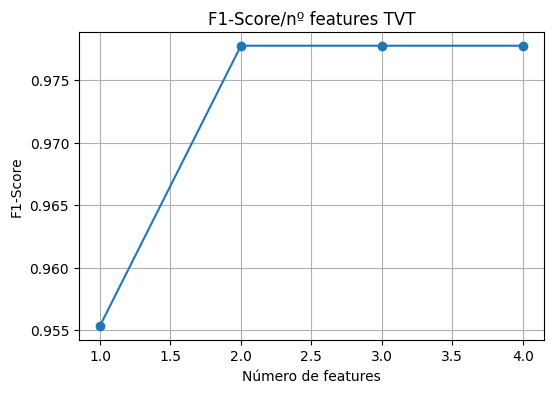

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 3 =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em kNN TVT k = 3

===== kNN CV k = 3 (means) =====
Recall:    0.9620
Precision: 0.9675
F1-Score:  0.9616

===== kNN TO k = 5 =====
Confusion Matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  2 48]]
Recall:    0.9600
Precision: 0.9605
F1-Score:  0.9600
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,1.000000,1.000000,1.000000


TOP 4 features
BEST FEATURES [3 2 0 1]


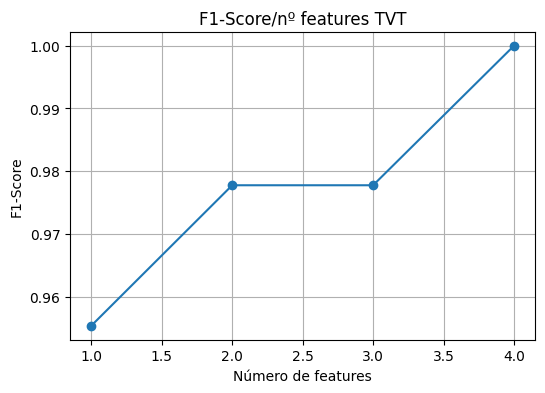

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 5 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Recall:    0.9778
Precision: 0.9792
F1-Score:  0.9778
Modelo salvo em kNN TVT k = 5

===== kNN CV k = 5 (means) =====
Recall:    0.9640
Precision: 0.9691
F1-Score:  0.9636

===== kNN TO k = 7 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,1.000000,1.000000,1.000000


TOP 4 features
BEST FEATURES [3 2 0 1]


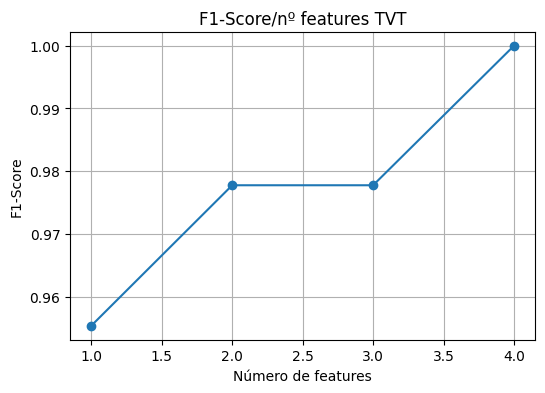

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 7 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
Recall:    0.9556
Precision: 0.9608
F1-Score:  0.9554
Modelo salvo em kNN TVT k = 7

===== kNN CV k = 7 (means) =====
Recall:    0.9627
Precision: 0.9672
F1-Score:  0.9624

===== kNN TO k = 9 =====
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
Recall:    0.9733
Precision: 0.9733
F1-Score:  0.9733
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,1.000000,1.000000,1.000000


TOP 4 features
BEST FEATURES [3 2 0 1]


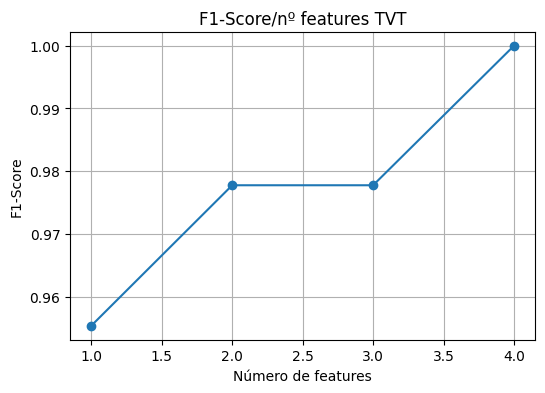

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 9 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
Recall:    0.9556
Precision: 0.9608
F1-Score:  0.9554
Modelo salvo em kNN TVT k = 9

===== kNN CV k = 9 (means) =====
Recall:    0.9667
Precision: 0.9709
F1-Score:  0.9663

===== kNN TO k = 11 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Recall:    0.9600
Precision: 0.9600
F1-Score:  0.9600
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.955556,0.960784,0.955357


TOP 2 features
BEST FEATURES [3 2]


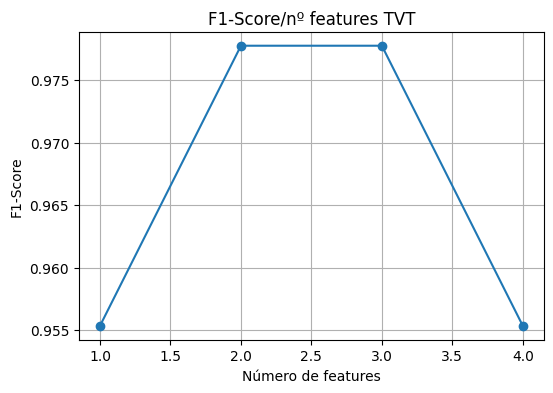

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 11 =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em kNN TVT k = 11

===== kNN CV k = 11 (means) =====
Recall:    0.9660
Precision: 0.9705
F1-Score:  0.9657

===== kNN TO k = 13 =====
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.955556,0.960784,0.955357
3,4,0.933333,0.944444,0.932660


TOP 2 features
BEST FEATURES [3 2]


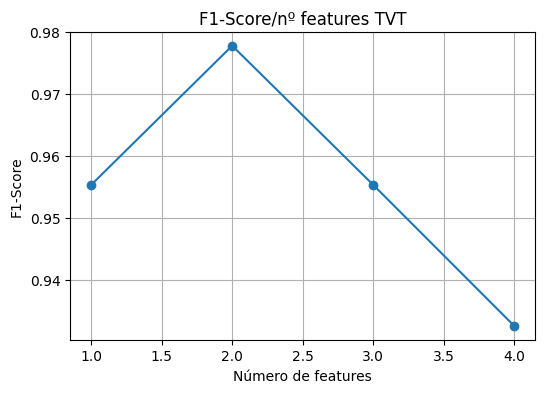

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 13 =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em kNN TVT k = 13

===== kNN CV k = 13 (means) =====
Recall:    0.9687
Precision: 0.9731
F1-Score:  0.9683

===== kNN TO k = 15 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667
Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


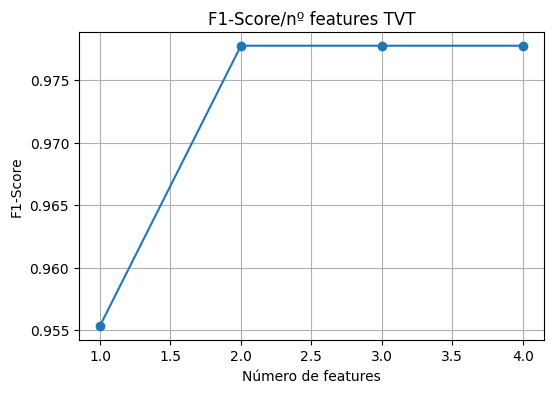

Best Parameters: {'weights': 'uniform', 'metric': 'euclidean'}

===== kNN TVT k = 15 =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em kNN TVT k = 15

===== kNN CV k = 15 (means) =====
Recall:    0.9707
Precision: 0.9750
F1-Score:  0.9703


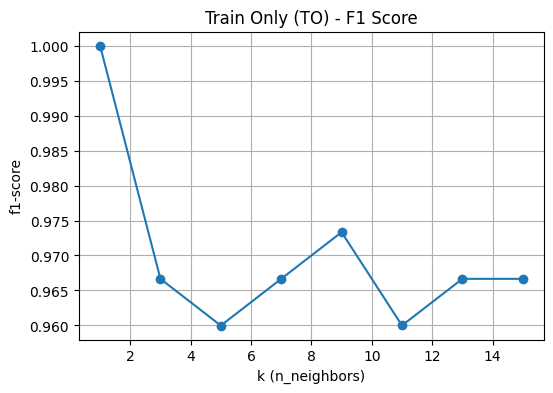

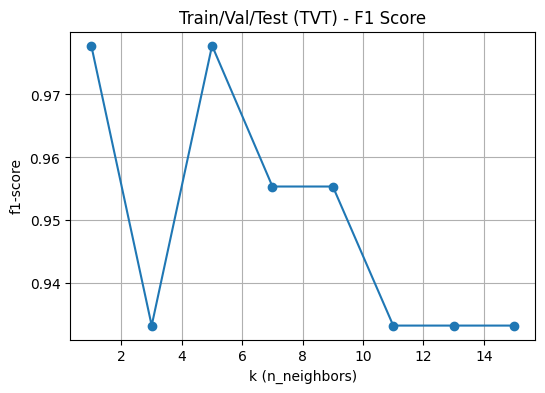

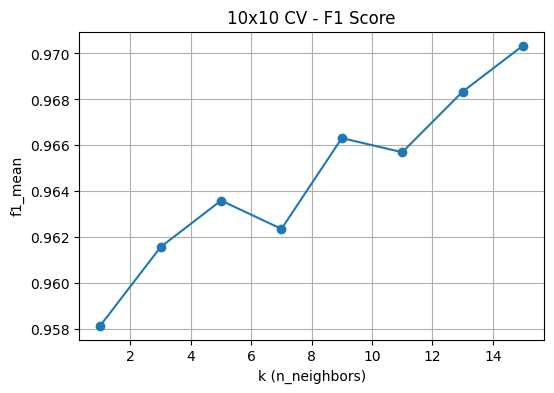

In [3]:
parameters = {
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
        }

to_scores = []
tvt_scores = []
cv_scores = []

for k in range(1,16,2):
    kNN = KNeighborsClassifier(n_neighbors = k)

    metrics_to = run_model(X_iris, y_iris, kNN, "TO", None, f"kNN TO k = {k}", f"kNN TO k = {k}", random_state=SEED)
    metrics_tvt = run_model(X_iris, y_iris, kNN, "TVT", parameters, f"kNN TVT k = {k}", f"kNN TVT k = {k}", random_state=SEED, feature_ranking=False)
    metrics_cv = run_model(X_iris, y_iris, kNN, "CV-base", parameters, f"kNN CV k = {k}", f"kNN CV k = {k}", random_state=SEED)

    to_scores.append({
        'k': k,
        'f1-score': metrics_to['f1-score']
    })

    tvt_scores.append({
        'k': k,
        'f1-score': metrics_tvt['f1-score']
    })

    cv_scores.append({
        'k': k,
        'f1_mean': metrics_cv['f1-score']
    })

plot_metrics(to_scores, metric_name='f1-score', title='Train Only (TO) - F1 Score')
plot_metrics(tvt_scores, metric_name='f1-score', title='Train/Val/Test (TVT) - F1 Score')
plot_metrics(cv_scores, metric_name='f1_mean', title='10x10 CV - F1 Score')

## EX 2.3.1. - TVT

Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


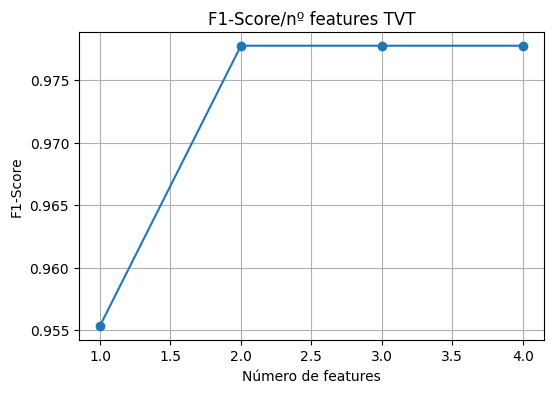

Best Parameters: {'n_neighbors': 1}

===== EX 2.3.1 TVT - KNN =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em ./models/ex2_3_1_tvt.pkl
FINAL METRICS: {'confusion_matrix': array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]]), 'recall': 0.9333333333333332, 'precision': 0.9345238095238096, 'f1-score': 0.9332591768631814}


In [4]:
model = KNeighborsClassifier()
parameters = { 'n_neighbors': list(range(1, 16, 2)) }
filename = "./models/ex2_3_1_tvt.pkl"
metrics = run_model(X_iris, y_iris, model, "TVT", parameters, filename, label="EX 2.3.1 TVT - KNN", random_state=SEED)
print("FINAL METRICS:", metrics)

## EX 2.3.1. - CV

In [5]:
models = {
    "OneR": DummyClassifier()     
    #"kNN": KNeighborsClassifier(),                           # k=5 por defeito
    #"C4.5": DecisionTreeClassifier(random_state=SEED),       # Decision Tree
    #"SVM": SVC(random_state=SEED)                         # SVM com kernel RBF por omissão
    # "ANN": MLPClassifier(random_state=SEED, max_iter=1000)   # Rede Neural
}

parameters = {

    'OneR': {
        'strategy': ['most_frequent', 'stratified', 'uniform']   # <-- parâmetros adicionados
    }# ,

    # 'kNN' : {
    #     'n_neighbors': [1, 3, 5, 7, 9],
    #     'weights': ['uniform', 'distance'],
    #     'metric': ['euclidean', 'manhattan']
    # },

    # 'C4.5' : {
    #     'max_depth': [None, 5, 10, 20],
    #     'min_samples_split': [2, 5, 10],
    #     'criterion': ['gini', 'entropy']
    # },

    # 'SVM' : {
    #     'C': [0.1, 1, 10],
    #     'kernel': ['linear', 'rbf'],
    #     'gamma': ['scale', 'auto']
    # }

    # 'ANN': {
    #     'hidden_layer_sizes': [(50,), (100,), (50,50)],
    #     'activation': ['tanh'],
    #     'alpha': [0.0001, 0.001, 0.01]
    # } estava a dar o warning: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
}

filename = "./models/ex2_3_1_cv.pkl"
metrics = run_model(X_iris, y_iris, models, "CV", parameters, filename, label="EX 2.3.1 TVT - KNN", random_state=SEED)
print("FINAL METRICS:", metrics)

Fold 0
Best Parameters: {'strategy': 'stratified'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 1
Best Parameters: {'strategy': 'uniform'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 2
Best Parameters: {'strategy': 'stratified'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 3
Best Parameters: {'strategy': 'uniform'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': Non

,Mean_F1,Std_F1
OneR,0.334069,0.109047
kNN,0.944704,0.059554
C4.5,0.952086,0.051988
SVM,0.957377,0.047925


Modelo com maior média de F1: SVM
SVC(random_state=42)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
Fold 15
Fold 16
Fold 17
Fold 18
Fold 19
Fold 20
Fold 21
Fold 22
Fold 23
Fold 24
Fold 25
Fold 26
Fold 27
Fold 28
Fold 29
Fold 30
Fold 31
Fold 32
Fold 33
Fold 34
Fold 35
Fold 36
Fold 37
Fold 38
Fold 39
Fold 40
Fold 41
Fold 42
Fold 43
Fold 44
Fold 45
Fold 46
Fold 47
Fold 48
Fold 49
Fold 50
Fold 51
Fold 52
Fold 53
Fold 54
Fold 55
Fold 56
Fold 57
Fold 58
Fold 59
Fold 60
Fold 61
Fold 62
Fold 63
Fold 64
Fold 65
Fold 66
Fold 67
Fold 68
Fold 69
Fold 70
Fold 71
Fold 72
Fold 73
Fold 74
Fold 75
Fold 76
Fold 77
Fold 78
Fold 79
Fold 80
Fold 81
Fold 82
Fold 83
Fold 84
Fold 85
Fold 86
Fold 87
Fold 88
Fold 89
Fold 90
Fold 91
Fold 92
Fold 93
Fold 94
Fold 95
Fold 96
Fold 97
Fold 98
Fold 99
[3, 2, 0, 1] 0.9684175084175085
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 

# EX 3

In [2]:
csv_path = "../A/data_prepared_for_training.csv"

df = pd.read_csv(csv_path)

# Converter para NumPy
data = df.to_numpy()

print(data.shape)

# Filtrar atividades entre 1 e 7 (coluna -2)
data = data[(data[:, -2] >= 1) & (data[:, -2] <= 7)]

print(data.shape)


[OK] Dados carregados de '../A/all_features_norm.npy'.
Tipo: <class 'numpy.ndarray'>
Len: 5

Primeiro elemento:
<class 'numpy.ndarray'>
shape: (16,)
(13833, 552)
(13311, 552)


## EX3.1

In [3]:
# 2. Separar Features (X) e Labels (y)
X = X_features = np.delete(data, -2, axis=1)
y = data[:, -2]


print(X.shape)
print(y.shape)

(13311, 551)
(13311,)


In [5]:
model = DummyClassifier()
parameters = {'strategy': ['most_frequent', 'stratified', 'uniform'] }   # <-- parâmetros adicionados}
filename = "./models/ex3.1_OneR - TO.pkl"
metrics = run_model(X, y, model, "TO", parameters, filename, label="EX 2.3.1 TO - OneR", random_state=SEED, use_iris=False)
print("FINAL METRICS:", metrics)


===== EX 2.3.1 TO - OneR =====
Confusion Matrix:
[[2847    0    0    0    0    0    0]
 [1522    0    0    0    0    0    0]
 [1452    0    0    0    0    0    0]
 [2545    0    0    0    0    0    0]
 [2555    0    0    0    0    0    0]
 [1606    0    0    0    0    0    0]
 [ 784    0    0    0    0    0    0]]
Recall:    0.1429
Precision: 0.0306
F1-Score:  0.0503
FINAL METRICS: {'confusion_matrix': array([[2847,    0,    0,    0,    0,    0,    0],
       [1522,    0,    0,    0,    0,    0,    0],
       [1452,    0,    0,    0,    0,    0,    0],
       [2545,    0,    0,    0,    0,    0,    0],
       [2555,    0,    0,    0,    0,    0,    0],
       [1606,    0,    0,    0,    0,    0,    0],
       [ 784,    0,    0,    0,    0,    0,    0]]), 'recall': 0.14285714285714285, 'precision': 0.030554750635886536, 'f1-score': 0.05034215691475253}


In [6]:
model = DummyClassifier()
parameters = {'strategy': ['most_frequent', 'stratified', 'uniform'] }   # <-- parâmetros adicionados}
filename = "./models/ex3.1_OneR - TT.pkl"
metrics = run_model(X, y, model, "TT", parameters, filename, label="EX 2.3.1 TT - OneR", random_state=SEED, use_iris=False)
print("FINAL METRICS:", metrics)

Treino: 9805 amostras
Teste: 3506 amostras
(9805, 550)
(9805,)
(3506, 550)
(3506,)

===== EX 2.3.1 TT - OneR =====
Confusion Matrix:
[[755   0   0   0   0   0   0]
 [398   0   0   0   0   0   0]
 [403   0   0   0   0   0   0]
 [667   0   0   0   0   0   0]
 [655   0   0   0   0   0   0]
 [425   0   0   0   0   0   0]
 [203   0   0   0   0   0   0]]
Recall:    0.1429
Precision: 0.0308
F1-Score:  0.0506
FINAL METRICS: {'confusion_matrix': array([[755,   0,   0,   0,   0,   0,   0],
       [398,   0,   0,   0,   0,   0,   0],
       [403,   0,   0,   0,   0,   0,   0],
       [667,   0,   0,   0,   0,   0,   0],
       [655,   0,   0,   0,   0,   0,   0],
       [425,   0,   0,   0,   0,   0,   0],
       [203,   0,   0,   0,   0,   0,   0]]), 'recall': 0.14285714285714285, 'precision': 0.030763588949555862, 'f1-score': 0.05062527240419754}


Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras
Score:
[353 352 356 132 133 136  15 209  11  12 342 125 341 345 319 101 123   1
   0 211   4 233 222 228 277 114  99 539 453 156 448 431 464 244 332 224
 497  13 257 112 499 255  22 442  23 334  26 365 367 376 338 429 169 287
 223 134 440 354 129 167 158 360 239 441 343 118 549  24 279 486   2 145
 283 162 470 407 475  48 261 444 455 147 382 477 250 462 323 306 266 140
 184   8 387 463  46 523 378 389 465 513 488 328 330 548  19  59 256 296
 321  57 541 111 510 454 110 544 517 349 404  30 511 543 331 466 173 413
  52 524  83 300 193 416 402 181 425  74 294 439 501 459  63 291 496 246
 371 303 529 151 520 481 492 213 528 104 451 397 333  68 219 218 410 415
 498 522 406 366 178 243 220 540 393 288 242 302 278 268 293 245 232 418
 542  37 452 272  71 476 516  35 419 401 417  84 121 197 122 315 358  89
 221 527 194 103 322 428 409 377  94 438 234 290 420 198 526 534 503 237
 214 199 403   3  67 398 355 525 545 189 157 108 

,n_features,recall,precision,f1
0,1,0.142857,0.030056,0.049663
1,2,0.142857,0.030056,0.049663
2,3,0.142857,0.030056,0.049663
3,4,0.142857,0.030056,0.049663
4,5,0.142857,0.030056,0.049663
...,...,...,...,...
545,546,0.142857,0.030056,0.049663
546,547,0.142857,0.030056,0.049663
547,548,0.142857,0.030056,0.049663
548,549,0.142857,0.030056,0.049663


TOP 1 features
BEST FEATURES [353]


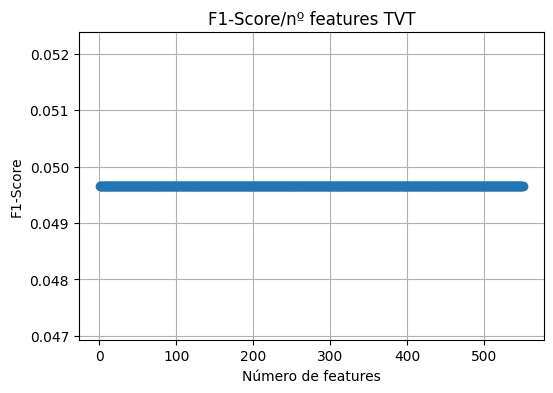

Best Parameters: {'strategy': 'uniform'}

===== EX 2.3.1 TVT - OneR =====
Confusion Matrix:
[[755   0   0   0   0   0   0]
 [398   0   0   0   0   0   0]
 [403   0   0   0   0   0   0]
 [667   0   0   0   0   0   0]
 [655   0   0   0   0   0   0]
 [425   0   0   0   0   0   0]
 [203   0   0   0   0   0   0]]
Recall:    0.1429
Precision: 0.0308
F1-Score:  0.0506
Modelo salvo em ./models/ex3.1_OneR - TVT.pkl
FINAL METRICS: {'confusion_matrix': array([[755,   0,   0,   0,   0,   0,   0],
       [398,   0,   0,   0,   0,   0,   0],
       [403,   0,   0,   0,   0,   0,   0],
       [667,   0,   0,   0,   0,   0,   0],
       [655,   0,   0,   0,   0,   0,   0],
       [425,   0,   0,   0,   0,   0,   0],
       [203,   0,   0,   0,   0,   0,   0]]), 'recall': 0.14285714285714285, 'precision': 0.030763588949555862, 'f1-score': 0.05062527240419754}


In [7]:
model = DummyClassifier()
parameters = {'strategy': ['most_frequent', 'stratified', 'uniform'] }   # <-- parâmetros adicionados}
filename = "./models/ex3.1_OneR - TVT.pkl"
metrics = run_model(X, y, model, "TVT", parameters, filename, label="EX 2.3.1 TVT - OneR", random_state=SEED, use_iris=False)
print("FINAL METRICS:", metrics)

In [4]:
model = {'OneR': DummyClassifier()}
parameters = {'strategy': ['most_frequent', 'stratified', 'uniform'] }   # <-- parâmetros adicionados}
filename = "./models/ex3.1_OneR - CV.pkl"
metrics = run_model(X, y, model, "CV", parameters, filename, label="EX 2.3.1 CV - OneR", random_state=SEED, use_iris=False)
print("FINAL METRICS:", metrics)

Total de folds criados: 100
Fold 0
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\João Cascais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\João Cascais\AppData\Local\Temp\ipykernel_62544\349376423.py", line 4, in <module>
    metrics = run_model(X, y, model, "CV", parameters, filename, label="EX 2.3.1 CV - OneR", random_state=SEED, use_iris=False)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\João Cascais\Desktop\MIACD\1º 25_26\TCD\TP1\TCD_2025\B\modelTraining.py", line 754, in run_model
    best_model, best_model_name, parameters = train_cv(X, y, model, parameters, filename, random_state=random_state, label=label, use_iris=use_iris)
                                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# EX 4 - MLP Existente

In [2]:
filename = 'dataset_raw_series.csv'
filename = '..\A\data_prepared_for_training2.csv'

In [ ]:
# testing
# 1. Carregar o CSV gerado
df = pd.read_csv(filename)

atividades_desejadas = [1, 2, 3, 4, 5, 6, 7]
# Mantém apenas as linhas onde 'activity' está na lista
df = df[df['activity'].isin(atividades_desejadas)]

# 2. Separar Features (X) e Labels (y)
X = df.drop(['person', 'activity'], axis=1)
y = df['activity']

# 3. Dividir Treino e Teste (70% treino, 30% teste por person_id)
pessoas_unicas = df['person'].unique()
print(f"Pessoas encontradas: {pessoas_unicas}")
train_ids, test_ids = train_test_split(pessoas_unicas, test_size=0.3, random_state=42)
print(f"IDs para Treino: {train_ids}")
print(f"IDs para Teste: {test_ids}")

# Filtrar o DataFrame original usando os IDs sorteados
train_df = df[df['person'].isin(train_ids)]
test_df = df[df['person'].isin(test_ids)]

# TREINO
X_train = train_df.drop(['person', 'activity'], axis=1)
y_train = train_df['activity']

# TESTE
X_test = test_df.drop(['person', 'activity'], axis=1)
y_test = test_df['activity']

# Verificar shapes
print("-" * 30)
print(f"Treino shape (X_train): {X_train.shape}")
print(f"Teste shape (X_test): {X_test.shape}")
print("-" * 30)

# NORMALIZAÇÃO
scaler = MinMaxScaler()

# Normalizaçao do Treino e transforma o treino
X_train_scaled = scaler.fit_transform(X_train)

# Usa o min e max do treino para transformar o teste (NÃO faz fit aqui!)
X_test_scaled = scaler.transform(X_test)

Pessoas encontradas: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
IDs para Treino: [ 9.  3.  2. 15.  5.  8. 11. 13.  4.  7.]
IDs para Teste: [10. 12.  1. 14.  6.]
------------------------------
Treino shape (X_train): (8879, 550)
Teste shape (X_test): (4432, 550)
------------------------------


In [5]:
# 4. Chamar função
createMLP(X_train_scaled, y_train, X_test_scaled, y_test, 
          label="Teste_Sensores",
          hidden_layers=(150),
          learning_rate=0.01,
          max_iter=1000)


===== Teste_Sensores =====
Confusion Matrix:
[[931   0   0   2   0   0   0   1]
 [  0 435  67   0   0   0   0   0]
 [  0 288 224   0   0   0   0   0]
 [  5   0   0 755  54   9   3   0]
 [  9   0   0 587 254   3   1   0]
 [  0   0   0   5   0 533   9   0]
 [  0   0   0   7   1 214  35   0]
 [  0   5   9   0   1   1   0  14]]
Recall:    0.6362
Precision: 0.7587
F1-Score:  0.6307


{'confusion_matrix': array([[931,   0,   0,   2,   0,   0,   0,   1],
        [  0, 435,  67,   0,   0,   0,   0,   0],
        [  0, 288, 224,   0,   0,   0,   0,   0],
        [  5,   0,   0, 755,  54,   9,   3,   0],
        [  9,   0,   0, 587, 254,   3,   1,   0],
        [  0,   0,   0,   5,   0, 533,   9,   0],
        [  0,   0,   0,   7,   1, 214,  35,   0],
        [  0,   5,   9,   0,   1,   1,   0,  14]], dtype=int64),
 'recall': 0.6361935789270206,
 'precision': 0.758666826666206,
 'f1-score': 0.630723038623737}

## 4.1.

In [ ]:
metrics = createMLP(X_train_scaled, y_train, X_test_scaled, y_test, label="4.1 - Fixed learning rate")
# print("Confusion Matrix:\n", metrics['confusion_matrix'])
# print("Recall:", metrics['recall'])
# print("Precision", metrics['precision'])
# print("F1-score", metrics['f1-score'])


Neurónios  | F1-Score  
-------------------------


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


10         | 0.1630


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


25         | 0.1803


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50         | 0.1470


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


75         | 0.1820


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


100        | 0.1763


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


150        | 0.1800


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


200        | 0.1876


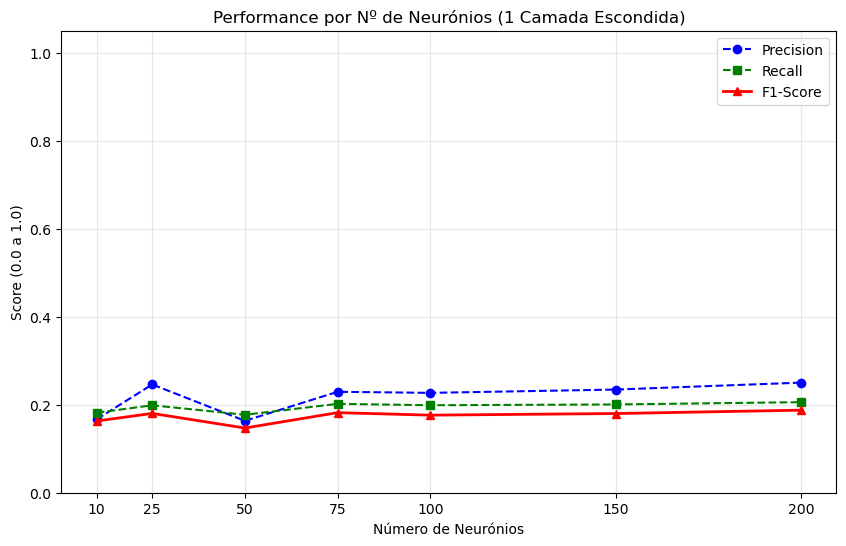

In [ ]:
resultados = createMLP_variableSizes(
    X_train_scaled, y_train, X_test_scaled, y_test,
    learning_rate_type='constant',
    learning_rate=0.01,
    momentum=0.0,
)

## 4.2

invscaling - a taxa de aprendizagem diminui a cada iteraçao de acordo com uma formula

adaptive - a taxa de aprendizagem só diminui quando a validaçao nao melhora

In [ ]:
metrics = createMLP(X_train, y_train, X_test, y_test, label="4.2 - variable learning rate", learning_rate_type='adaptive')

Neurónios  | F1-Score  
-------------------------


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


10         | 0.6948


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


25         | 0.8062


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50         | 0.7276


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


75         | 0.8450


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


100        | 0.8615


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


150        | 0.8326
200        | 0.8547


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


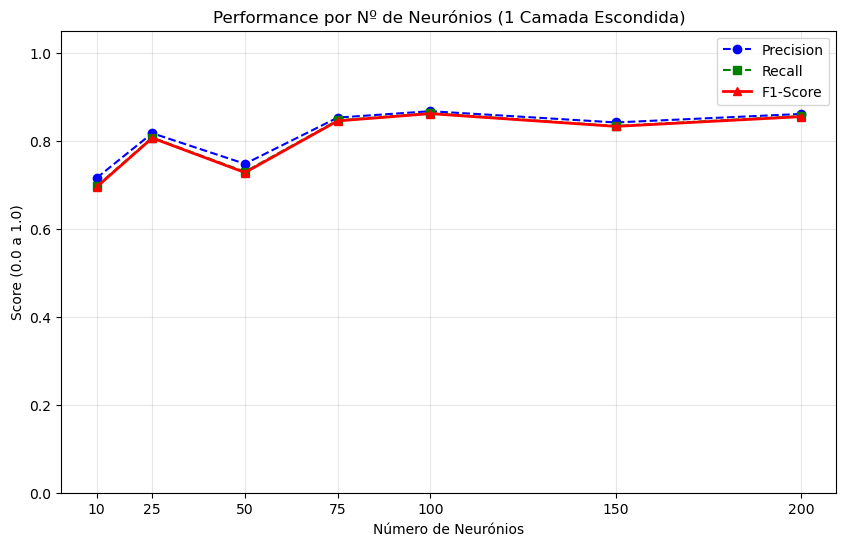

{'sizes': [10, 25, 50, 75, 100, 150, 200],
 'f1_scores': [0.6948328849418333,
  0.8062036046487051,
  0.7276435872709953,
  0.8450379658273043,
  0.8615051148942394,
  0.8325673963192631,
  0.8547061417053905],
 'precision': [0.7152981862402636,
  0.8170692322451101,
  0.7474969073912126,
  0.8525482662770656,
  0.8671077869369096,
  0.8415234604459382,
  0.8608528026100719],
 'recall': [0.6964797127222984,
  0.8072810259917921,
  0.7295578020975831,
  0.8462156452348382,
  0.8623951071591428,
  0.8335488326493389,
  0.8559504696762426]}

In [7]:
createMLP_variableSizes(
    X_train_scaled, y_train, X_test_scaled, y_test,
    learning_rate_type='adaptive',  
    learning_rate=0.01, # Valor inicial
    momentum=0.0,
)

## 4.3

In [ ]:
metrics = createMLP(X_train, y_train, X_test, y_test, label="4.2 - variable learning rate", learning_rate_type='adaptive', momentum=0.9)

Neurónios  | F1-Score  
-------------------------
10         | 0.7142
25         | 0.8626


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50         | 0.9258
75         | 0.9134
100        | 0.9334
150        | 0.9403
200        | 0.9391


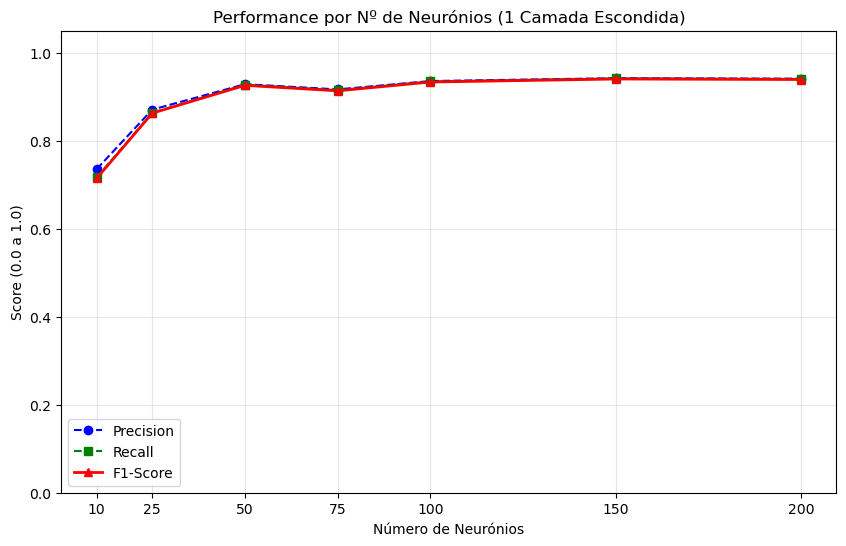

{'sizes': [10, 25, 50, 75, 100, 150, 200],
 'f1_scores': [0.7142350625627312,
  0.8626255601830823,
  0.9258464083979929,
  0.9134069083395197,
  0.9333726088525884,
  0.9402846898295344,
  0.9390913931259284],
 'precision': [0.7354341836587738,
  0.8706174562006932,
  0.9284318627612226,
  0.9166612063048099,
  0.9356431227908658,
  0.9421424991703148,
  0.9410447813408528],
 'recall': [0.7165464067487459,
  0.8635230916552669,
  0.9273563246694027,
  0.9149092202462381,
  0.9346771637026905,
  0.9416682170542636,
  0.9404234290925672]}

In [8]:
createMLP_variableSizes(
    X_train_scaled, y_train, X_test_scaled, y_test,
    learning_rate_type='adaptive',
    learning_rate=0.01,
    momentum=0.9,  # Valor típico de momentum (0.9)
)

# EX 5

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
data = 
labels = 

In [8]:
import numpy as np
import pandas as pd

# Certifique-se de que a classe NeuralNetwork (o código grande anterior) já foi executada/importada

# 1. Definir a arquitetura
# X_train_scaled.shape[1] dá-nos o número de colunas (features) automaticamente
input_size = X_train_scaled.shape[1] 
hidden_size = 100
output_size = int(np.max(y_train)) + 1

layer_sizes = [input_size, hidden_size, output_size]

# 2. Criar a rede
# Nota: Use o nome da classe que definiu (NeuralNetwork ou OurMLP)
nn = OurNeuralNetwork(layer_sizes, activation="sigmoid", learning_rate=1.0)

# 3. Treinar com os dados SCALED
print("A iniciar treino...")
# O método train usa o forward -> backward -> update weights repetidamente
history = nn.train(X_train_scaled, y_train, epochs=1000)

# 4. Agora sim: Usar o Teste (Respondendo à sua pergunta)
print("\nA fazer previsões no conjunto de Teste...")
# O predict serve para QUALQUER dado. Aqui passamos o X_test (que tmb deve estar scaled)
preds_test = nn.evaluate(X_test_scaled, y_test) # Assumindo que você tem um X_test_scaled

preds_reais = nn.predict(X_test_scaled)

print("\nPrevisões (primeiras 10):", preds_reais[:10])

A iniciar treino...
Epoch 0: Loss 2.0729
Epoch 100: Loss 0.8939
Epoch 200: Loss 0.7326
Epoch 300: Loss 0.6112
Epoch 400: Loss 0.5700
Epoch 500: Loss 0.5417
Epoch 600: Loss 0.5273
Epoch 700: Loss 0.5766
Epoch 800: Loss 0.4863
Epoch 900: Loss 0.4865

A fazer previsões no conjunto de Teste...

===== Test Results =====
Confusion Matrix:
[[929   0   0   4   0   1   0]
 [  0 425  77   0   0   0   0]
 [  0 245 267   0   0   0   0]
 [  4   0   0 782  30  10   0]
 [ 11   0   0 663 175   5   0]
 [  0   0   0   2   0 545   0]
 [  0   0   0   4   1 250   2]]
Recall:    0.6455
Precision: 0.7791
F1-Score:  0.5961

Previsões (primeiras 10): [1 1 1 1 1 1 1 1 1 1]
